# MAP2220 - Fundamentos de Análise Numérica
## 2º Semestre de 2020 - Prof. Nelson Kuhl
## Exercícios da lista sobre o MMQ - Famílias não lineares nos parâmetros

In [1]:
using Plots, LinearAlgebra

**Exercício 11** Pede-se para ajustar a tabela
$$
    \begin{array}{c|cccc}
        x & 0 & 1 & 2 & 3 \\
        \hline
        y & 0.6 & 4.7 & 40 & 365
    \end{array}
$$
sabendo-se que $f(x) = a3^{bx}$ descreve bem os dados. Neste caso, é possível modificar o problema para um problema linear.
Calculando-se o logaritmo na base 3 obtemos
$$
    \log_3(f(x)) = \log_3 a + bx,
$$
o que sugere aproximar $F(x) = \log_3(f(x))$ por uma função da forma $g(x) = \alpha + \beta x$ pelo MMQ. Precisamos então de uma nova tabela formada por $x_i$ e $Y_i = \log_3 y_i$. Uma vez obtida a resposta, escolhemos $a = 3^{\alpha}$ e $b = \beta$.

In [2]:
# Dados
x = collect(0:3); y = [0.6; 4.7; 40; 365]
Y = log.(y)/log(3) # Logarítmos na base 3 dos y_i
[x'; y'; Y']

3×4 Array{Float64,2}:
  0.0       1.0       2.0        3.0
  0.6       4.7      40.0      365.0
 -0.464974  1.40865   3.35776    5.37032

In [3]:
# Sistema normal para o problema modificado
A = zeros(2,2); A[1,1] = 4; A[1,2] = sum(x); A[2,1] = A[1,2]; A[2,2] = sum(x.*x); # Matriz
d = zeros(2); d[1] = sum(Y); d[2] = sum(x.*Y) # Lado direito
[A d]

2×3 Array{Float64,2}:
 4.0   6.0   9.67176
 6.0  14.0  24.2351

In [4]:
# Solução do sistema normal
v = A\d

2-element Array{Float64,1}:
 -0.5003079467837098
  1.9454985255403687

In [5]:
# Parâmetros
a = 3^v[1]; b = v[2]
[a b]

1×2 Array{Float64,2}:
 0.577155  1.9455

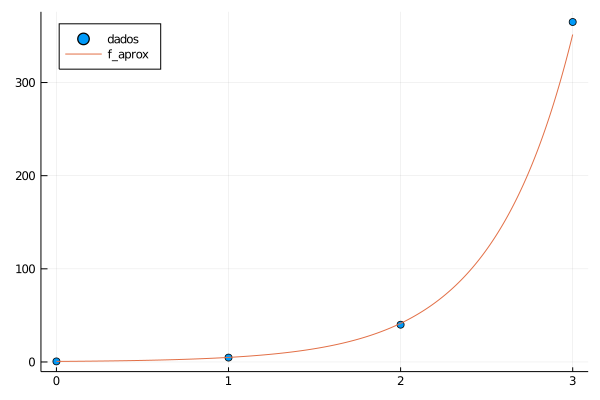

In [6]:
# Figura
scatter(x, y, label = "dados", legend = :topleft) # Dados da tabela
f_aprox(t) = a*3^(b*t) # Aproximação
xx = collect(0:0.001:3); # Pontos para o gráfico de g
plot!(xx, f_aprox.(xx), label = "f_aprox")

**Exercício 16** Os dados da tabela
$$
    \begin{array}{c|ccccc}
        r & 2.70 & 2.00 & 1.61 & 1.20 & 1.02 \\
        \hline
        \theta & 48^{\circ} & 67^{\circ} & 83^{\circ} & 108^{\circ} & 126^{\circ}
    \end{array}
$$
devem ser ajustados segundo a lei de Kepler
$$
    r = \frac{p}{1 - \epsilon\cos\theta},
$$
que é a equação de uma elipse em coordenadas polares, onde a origem está em um dos focos. Para determinarmos $p$ e $\epsilon$, podemos manipular a expressão acima e obter
$$
    (1-\epsilon\cos\theta)r = p \quad\Longrightarrow \quad r = p + \epsilon r\cos\theta,
$$
o que nos permite formular um novo problema, agora linear nos parâmetros:
$$
    \text{aproxime } r(\theta) \text{ por uma função da forma }
    g(\theta) = pg_0(\theta) + \epsilon g_1(\theta), \quad \text{onde } g_0(\theta) = 1 \text{ e }
    g_1(\theta) = r(\theta)\cos\theta.
$$
Pode parecer estranho (e de fato é) que $g_1$, usada para aproximar $r$, dependa de $r$. Mas temos todas as informações necessárias nos dados da tabela.

In [7]:
# Dados
r = [2.7; 2.0; 1.61; 1.2; 1.02]
θ = [48; 67; 83; 108; 126] * pi / 180 # Convertido para radianos
[r'; θ']

2×5 Array{Float64,2}:
 2.7       2.0      1.61     1.2      1.02
 0.837758  1.16937  1.44862  1.88496  2.19911

In [8]:
# Funções aproximadoras NOS PONTOS DA TABELA
g0 = ones(5); g1 = r.*cos.(θ)
[g0'; g1']

2×5 Array{Float64,2}:
 1.0      1.0       1.0       1.0       1.0
 1.80665  0.781462  0.19621  -0.37082  -0.599541

In [9]:
# Sistema normal
A = zeros(2,2); A[1, 1] = g0'*g0; A[1, 2] = g0'*g1; A[2, 1] = A[1, 2]; A[2, 2] = g1'*g1
b = zeros(2); b[1] = g0'*r; b[2] = g1'*r
[A b]

2×3 Array{Float64,2}:
 5.0      1.81396  8.53
 1.81396  4.41013  5.70027

In [10]:
# Solução
a = A\b
a'

1×2 Adjoint{Float64,Array{Float64,1}}:
 1.45405  0.694461

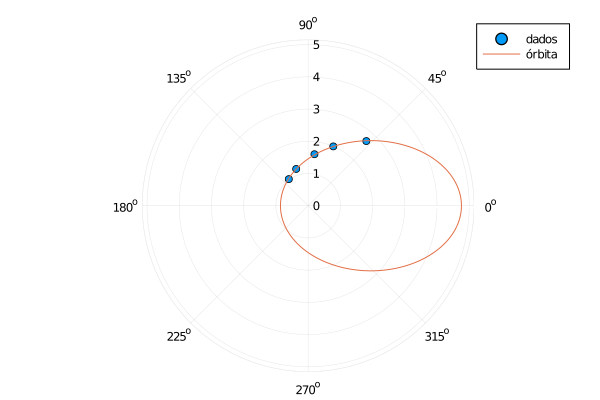

In [11]:
# Figura
scatter(θ, r, proj = :polar, label = "dados")
r_aprox(t) = a[1]/(1 - a[2]*cos(t))
t = collect(range(0, stop=2*pi, step=pi/180))
plot!(t, r_aprox.(t), proj = :polar, label = "órbita")

A modificação do problema original para um problema linear nos parâmetros, quando é possível fazê-la, não é necessariamente única. Neste exemplo, podemos manipular a equação da elipse de forma diferente:
$$
    \frac{1}{r} = \frac{1}{p} - \frac{\epsilon}{p}\cos\theta.
$$
A expressão acima sugere aproximarmos $F = \frac{1}{r}$ por uma função da forma $g(\theta) = a_0g_0(\theta) + a_1g_1(\theta)$
pelo MMQ, onde $g_0(\theta) = 1$ e $g_1(\theta) = \cos\theta$. Uma vez calculada a solução, obtemos $p = \frac{1}{a_0}$ e $\epsilon = -pa_1$.

In [12]:
F = 1 ./ r # Novos dados
[θ'; F'] # Tabela com θ e 1/r

2×5 Array{Float64,2}:
 0.837758  1.16937  1.44862   1.88496   2.19911
 0.37037   0.5      0.621118  0.833333  0.980392

In [13]:
g0 = ones(5); g1 = cos.(θ) # Valores das funções da base nos pontos da tabela
# Matriz do sistema normal
A = zeros(2,2); A[1,1] = g0'*g0; A[1,2] = g0'*g1; A[2,1] = A[1,2]; A[2,2] = g1'*g1
# Lado direito do sistema normal
b = zeros(2); b[1] = g0'*F; b[2] = g1'*F
[A b]

2×3 Array{Float64,2}:
 5.0       0.284929   3.30521
 0.284929  1.05624   -0.314887

In [14]:
# Solução do sistema normal e parâmetros
c = A\b; p = 1/c[1]; ϵ = -p*c[2]
[p ϵ;a'] # Novos parâmetros e os parâmetros anteriores

2×2 Array{Float64,2}:
 1.45219  0.702684
 1.45405  0.694461

Note que apesar de próximos, não são iguais. Vejamos a figura com os novos parâmetros.

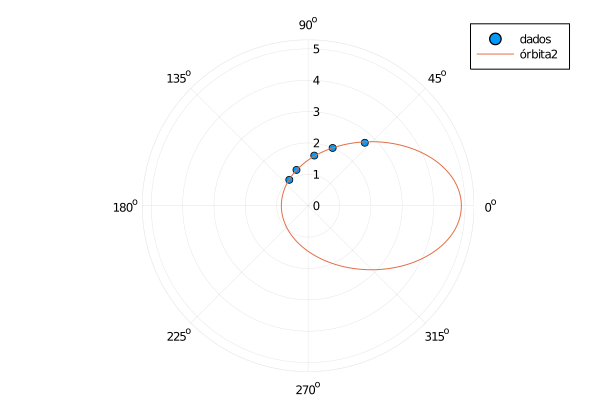

In [15]:
# Figura
scatter(θ, r, proj = :polar, label = "dados")
r2_aprox(t) = p/(1 - ϵ*cos(t))
t = collect(range(0, stop=2*pi, step=pi/180))
plot!(t, r2_aprox.(t), proj = :polar, label = "órbita2")

 A figura também se ajusta bem. Qual das duas aproximações escolher? Como um critério no contexto de mínimos quadrados, podemos
 comparar os erros quadráticos
 $$
     EQ1 = \sqrt{\sum_i[r_i - r_{aprox}(\theta_i)]^2} \quad \text{e} \quad
     EQ2 = \sqrt{\sum_i[r_i - r2_{aprox}(\theta_i)]^2} .
 $$

In [16]:
EQ1 = norm(r - r_aprox.(θ)); EQ2 = norm(r - r2_aprox.(θ))
[EQ1 EQ2]

1×2 Array{Float64,2}:
 0.030214  0.0475598

Por esse critério, escolherámos a primeira aproximação.

**Exercício 24** Agora temos a tabela
$$
    \begin{array}{c|ccccc}
        x & -2 & -1 & 0 & 1 & 2 \\
        \hline
        y & 1 & 2 & 8 & 4 & 1
    \end{array}
$$
para uma função da forma
$$
    f(x) = \alpha 2^{\beta (x - \gamma)^2}.
$$
Aplicando-se o logarítmo na base 2 aos dois lados da expressão acima obtemos
$$
    \log_2[f(x)] = \log_2\alpha + \beta (x - \gamma)^2 = \log_2\alpha + \beta\gamma^2 - 2\beta\gamma x + \beta x^2.
$$
Isto sugere modificarmos o problema para aproximarmos $F(x) = \log_2[f(x)]$ por $g(x) = a_0 + a_1x + a_2x^2$ pelo MMQ. Uma vez calculados os coeficientes obtemos
$$
    \beta = a_2, \quad \gamma = -\frac{a_1}{2\beta} \quad \text{e} \quad \alpha = 2^{a_0 - \beta\gamma^2}.
$$

In [17]:
# Dados
x = [-2; -1; 0; 1; 2]
y = [1; 2; 8; 4; 1]
Y = [0; 1; 3; 2; 0] # Logarítmos dos y_i na base 2
[x'; y'; Y']

3×5 Array{Int64,2}:
 -2  -1  0  1  2
  1   2  8  4  1
  0   1  3  2  0

In [18]:
# Sistema normal
g0 = x.^0; g1 = x; g2 = x.^2 # Base nos pontos da tabela
A = zeros(3,3); A[1, 1] = g0'*g0; A[1, 2] = g0'*g1; A[1,3] = g0'*g2
                A[2, 1] = A[1, 2]; A[2, 2] = g1'*g1; A[2, 3] = g1'*g2
                A[3, 1] = A[1, 3]; A[3, 2] = A[2, 3]; A[3, 3] = g2'*g2
b = zeros(3); b[1] = g0'*Y; b[2] = g1'*Y; b[3] = g2'*Y # Note: Y e não y
[A b]

3×4 Array{Float64,2}:
  5.0   0.0  10.0  6.0
  0.0  10.0   0.0  1.0
 10.0   0.0  34.0  3.0

In [19]:
# Solução
a = A\b # Poderia resolver manualmente
a'

1×3 Adjoint{Float64,Array{Float64,1}}:
 2.48571  0.1  -0.642857

In [20]:
# Parâmetros
β = a[3]
γ = -a[2]/(2*β)
α = 2^(a[1] - β*γ*γ)
[α β γ]

1×3 Array{Float64,2}:
 5.61623  -0.642857  0.0777778

In [21]:
# Aproximações e erro
g(t) = a[1] + a[2]*t + a[3]*t^2
gnl(t) = α*2^(β*(t - γ)^2)
EQ_linear = norm(Y - g.(x)) # Erro quadrático do problema linearizado
EQ_nlinear = norm(y - gnl.(x)) # Erro quadrático para o problema não linear com os parâmetros obtidos
[EQ_linear EQ_nlinear]

1×2 Array{Float64,2}:
 0.956183  2.76264

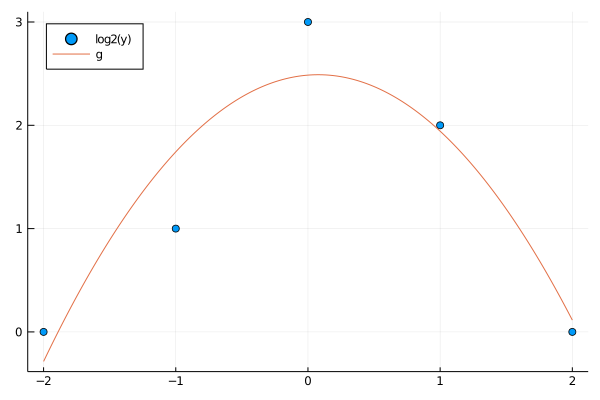

In [22]:
# Figura (linearizado)
scatter(x, Y, label = "log2(y)", legend = :topleft)
xx = collect(-2:0.001:2)
plot!(xx, g.(xx), label = "g")

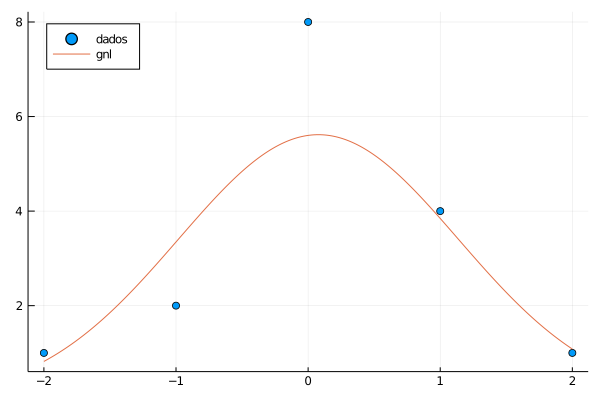

In [23]:
# Figura
scatter(x, y, label = "dados", legend = :topleft)
xx = collect(-2:0.001:2)
plot!(xx, gnl.(xx), label = "gnl")